In [1]:
from transformers import GPT2LMHeadModel

In [2]:
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")  # 124M
sd_hf = model_hf.state_dict()

for k, v in sd_hf.items():
  print(k, v.shape)
  
# transformer.wte.weight torch.Size([50257, 768])  # 50257 is the vocab size, token embedding
# transformer.wpe.weight torch.Size([1024, 768])   # 上下文长度1024，position embedding 1024x768

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

In [3]:
sd_hf["transformer.wpe.weight"].view(-1)[:20]

tensor([-0.0188, -0.1974,  0.0040,  0.0113,  0.0638, -0.1050,  0.0369, -0.1680,
        -0.0491, -0.0565, -0.0025,  0.0135, -0.0042,  0.0151,  0.0166, -0.1381,
        -0.0063, -0.0461,  0.0267, -0.2042])

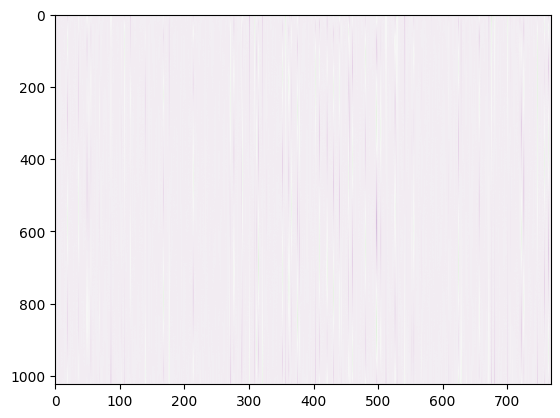

In [7]:
import matplotlib.pyplot as plt
# %matplotlib inline  # 在jupyter notebook中显示图片

plt.imshow(sd_hf["transformer.wpe.weight"], cmap='PRGn_r', aspect='auto')
# 每一行是一个token的pos embedding， [768]

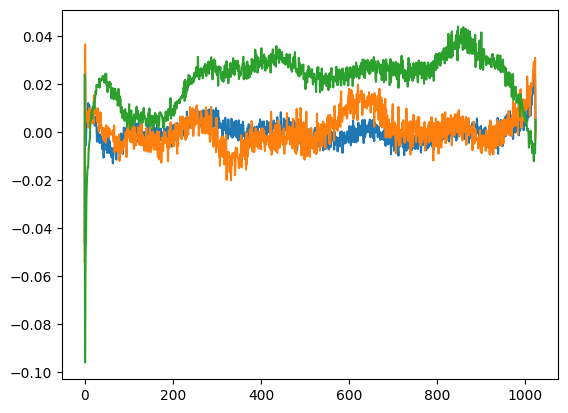

In [8]:
# 看三个不同列，不是pos embedding。
plt.plot(sd_hf["transformer.wpe.weight"][:, 150])
plt.plot(sd_hf["transformer.wpe.weight"][:, 200])
plt.plot(sd_hf["transformer.wpe.weight"][:, 250])
#@ 在gpt里pos embedding是训练的参数而不是固定的。

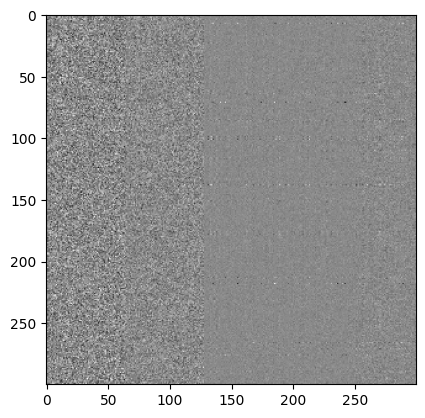

In [10]:
plt.imshow(sd_hf["transformer.h.1.attn.c_attn.weight"][:300,:300], cmap='gray')

In [11]:
from transformers import pipeline, set_seed
generator = pipeline('text-generation', model='gpt2')
set_seed(42)
generator("Hello, I'm a language model,", max_length=30, num_return_sequences=5)

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': "Hello, I'm a language model, but what I'm really doing is making a human-readable document. There are other languages, but those are"},
 {'generated_text': "Hello, I'm a language model, not a syntax model. That's why I like it. I've done a lot of programming projects.\n"},
 {'generated_text': "Hello, I'm a language model, and I'll do it in no time!\n\nOne of the things we learned from talking to my friend"},
 {'generated_text': "Hello, I'm a language model, not a command line tool.\n\nIf my code is simple enough:\n\nif (use (string"},
 {'generated_text': "Hello, I'm a language model, I've been using Language in all my work. Just a small example, let's see a simplified example."}]

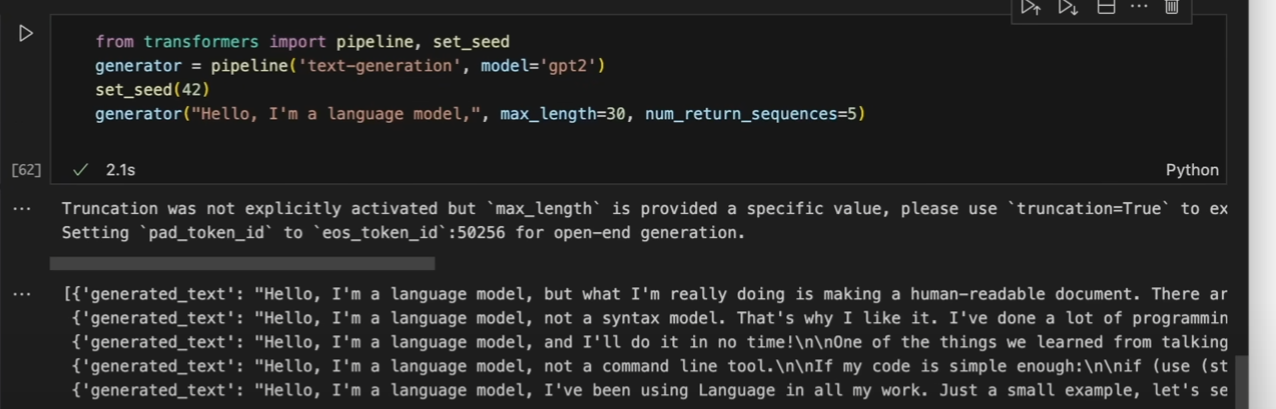

In [18]:
import torch
l = range(10)
l_t = torch.tensor(l)
l_t = l_t.unsqueeze(1)
M = l_t @ l_t.t()

print(l_t.shape)
print(M)

torch.Size([10, 1])
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
        [ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18],
        [ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27],
        [ 0,  4,  8, 12, 16, 20, 24, 28, 32, 36],
        [ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45],
        [ 0,  6, 12, 18, 24, 30, 36, 42, 48, 54],
        [ 0,  7, 14, 21, 28, 35, 42, 49, 56, 63],
        [ 0,  8, 16, 24, 32, 40, 48, 56, 64, 72],
        [ 0,  9, 18, 27, 36, 45, 54, 63, 72, 81]])


In [12]:
l_s = torch.tensor(l).view(1, -1)
print(l_s.shape)

torch.Size([1, 10])


In [13]:
import torch

# 一维张量
x = torch.tensor([1, 2, 3, 4])
print(x.shape)  # 输出: torch.Size([4])

# 将一维张量变成列向量
x_column = x.unsqueeze(1)  # 或 x[:, None]
print(x_column.shape)  # 输出: torch.Size([4, 1])

# 将一维张量变成行向量
x_row = x.unsqueeze(0)  # 或 x[None, :]
print(x_row.shape)  # 输出: torch.Size([1, 4])


torch.Size([4])
torch.Size([4, 1])
torch.Size([1, 4])


`unsqueeze` 语法
```python
torch.unsqueeze(input, dim) -> Tensor
input: 输入的张量。
dim: 指定在哪个维度上插入一个新维度（从 0 开始计数）。
```

In [20]:
y = torch.tensor([[1, 2, 3], [4, 5, 6]])  # Shape: (2, 3)
print(y.shape)  # 输出: torch.Size([2, 3])

# 在第 0 个维度增加维度
y_unsqueeze_0 = torch.unsqueeze(y, 0)
print(y_unsqueeze_0.shape)  # 输出: torch.Size([1, 2, 3])

# 在第 2 个维度增加维度
y_unsqueeze_2 = torch.unsqueeze(y, 2)
print(y_unsqueeze_2.shape)  # 输出: torch.Size([2, 3, 1])


torch.Size([2, 3])
torch.Size([1, 2, 3])
torch.Size([2, 3, 1])


In [22]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# 沿第 0 维拼接
result_cat = torch.cat((a, b), dim=0)
print(result_cat.shape)  # torch.Size([4, 2])
print(result_cat)


torch.Size([4, 2])
tensor([[1, 2],
        [3, 4],
        [5, 6],
        [7, 8]])


In [27]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6], [7, 8]])

# 在第 0 维叠加
result_stack = torch.stack((a, b), dim=0)
print(result_stack.shape)  # torch.Size([2, 2, 2])
print(result_stack)

print("-"*100)

# 在第 1 维叠加
result_stack = torch.stack((a, b), dim=1)
print(result_stack.shape)  # torch.Size([2, 2, 2])
print(result_stack)


torch.Size([2, 2, 2])
tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
----------------------------------------------------------------------------------------------------
torch.Size([2, 2, 2])
tensor([[[1, 2],
         [5, 6]],

        [[3, 4],
         [7, 8]]])


In [30]:
torch.randint(0, 10, (2, 3)) # 生成一个2x3的随机整数张量，张量中的值在[0, 10)之间

tensor([[1, 3, 0],
        [3, 8, 9]])

### **`torch.multinomial` 方法**

`torch.multinomial` 是 PyTorch 中用于从概率分布中采样的函数。它的主要用途是根据给定的概率分布随机选择样本，例如在语言模型中基于 softmax 输出的概率分布选择下一个单词。

---

### **语法**
```python
torch.multinomial(input, num_samples, replacement=False, *, generator=None) -> Tensor
```

#### **参数说明**
- **`input`**: 一个一维或二维张量，表示概率分布（需要非负，且至少有一个非零值）。
  - 对每个元素的值 \( p_i \)，表示被采样的权重（权重越大，被选中的概率越高）。
  - 如果输入张量未归一化（总和不为 1），`multinomial` 会自动进行归一化处理。

- **`num_samples`**: 要从分布中采样的样本数量。

- **`replacement`**:
  - 如果为 `True`：允许重复采样，即一个样本可以被选中多次。
  - 如果为 `False`：不允许重复采样（此时 `num_samples` 不能大于输入张量中非零值的数量）。

- **`generator`**（可选）:
  - 用于控制随机数生成的种子，保证采样结果的可复现性。

#### **返回值**
- 返回一个张量，表示采样的索引位置。



In [34]:
# 定义概率分布（权重）
weights = torch.tensor([0.1, 0.2, 0.3, 0.4])

# 采样 5 个样本（允许重复采样）
samples = torch.multinomial(weights, 5, replacement=True)
print(samples)  # 输出: 张量表示采样的索引，例如 tensor([3, 2, 3, 1, 3])

tensor([3, 1, 3, 1, 3])


In [60]:
import torch
from transformers import set_seed
from matplotlib import pyplot as plt
import pandas as pd
set_seed(1337)

weights = torch.rand(3, 5)  # 生成一个形状为 3x5 的张量
# 对每一行归一化
sum_weights = weights.sum(dim=1, keepdim=True)
print(sum_weights.shape)

# 绘制「分组柱状图」, 每一个位置有三列，列高为对应位置的数值
# pd.DataFrame(torch.rand(3, 5).numpy()).T.plot(kind='bar');
print(weights)

samples = torch.multinomial(weights, 6, replacement=True)  # 每行采样 4 个样本
samples

torch.Size([3, 1])
tensor([[0.0783, 0.4956, 0.6231, 0.4224, 0.2004],
        [0.0287, 0.5851, 0.6967, 0.1761, 0.2595],
        [0.7086, 0.5809, 0.0574, 0.7669, 0.8778]])


tensor([[4, 3, 1, 3, 3, 3],
        [2, 2, 2, 4, 2, 2],
        [4, 3, 0, 3, 3, 0]])

In [71]:
torch.randint(0, 10, (5, )) # 生成一个2x3的随机整数张量，张量中的值在[0, 10)之间

tensor([6, 8, 6, 9, 9])

In [79]:

x = torch.randint(0, 10, (3, 2, 3, ))
y = torch.randint(0, 10, (3, 2, 3,))
print(x)
print(y)
torch.cat((x, y), dim=-1).shape

tensor([[[2, 9, 9],
         [6, 2, 4]],

        [[2, 8, 8],
         [1, 8, 6]],

        [[2, 5, 3],
         [2, 2, 1]]])
tensor([[[6, 2, 4],
         [0, 1, 6]],

        [[8, 9, 7],
         [0, 5, 4]],

        [[3, 1, 0],
         [4, 5, 5]]])


torch.Size([3, 2, 6])